# Mean Atmospheric Temperature

https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/doc/GHCND_documentation.pdf

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import folium

import numpy as np

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.plotting import plot_bar_probs
from ind_setup.colors import get_df_col

sys.path.append("../../../functions")
from data_downloaders import GHCN

## Define location and variables of interest

In [3]:
country = 'Palau'
vars_interest = ['TMIN', 'TMAX']

## Get Data

In [4]:
df_country = GHCN.get_country_code(country)
print(f'The GHCN code for {country} is {df_country["Code"].values[0]}')

The GHCN code for Palau is PS


In [5]:
df_stations = GHCN.download_stations_info()
df_country_stations = df_stations[df_stations['ID'].str.startswith(df_country.Code.values[0])]
print(f'There are {df_country_stations.shape[0]} stations in {country}')

There are 13 stations in Palau


In [6]:
GHCND_dir = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
for var in vars_interest:
    globals()[f"dict_{var}"], IDS = GHCN.extract_dict_data_var(GHCND_dir, var, df_country_stations)

## Plot Data

In [7]:
map = folium.Map(location=[df_country_stations.iloc[0].Latitude-.25, df_country_stations.iloc[0].Longitude], zoom_start=10)

# Color list
colors = get_df_col()

# Add markers
ids_with_data = df_country_stations[df_country_stations['ID'].isin(np.unique(IDS))]
for i in range(len(ids_with_data)):
    folium.Marker(
        location=[ids_with_data.iloc[i].Latitude, ids_with_data.iloc[i].Longitude],
        popup=ids_with_data.iloc[i]['ID'] + ids_with_data.iloc[i]['Name'],
        icon=folium.DivIcon(
        html=f'<div style="font-size: 25px; color: white; background-color: {colors[i]}; line-height: 1; width: 24px; padding: 0px;">&#9737;</div>'
    )
    ).add_to(map)

map

In [21]:
for var in vars_interest:
    
    dict_plot = globals()[f'dict_{var}']
    fig = plot_timeseries_interactive(dict_plot, trendline=False, ylims = [5, 40], figsize = (25, 12))

## Using Koror Station

Analysis of how much the maximum and minimum temperatures over time are changing. <br>
The analysis of the difference between these 2 variables will allow us to know how the daily variability is being modified

In [9]:
id = 'PSW00040309' # Koror Station
dict_min = GHCN.extract_dict_data_var(GHCND_dir, 'TMIN', df_country_stations.loc[df_country_stations['ID'] == id])[0][0]
dict_max = GHCN.extract_dict_data_var(GHCND_dir, 'TMAX', df_country_stations.loc[df_country_stations['ID'] == id])[0][0]

In [10]:
import pandas as pd
st_data = pd.concat([dict_min['data'], (dict_max['data'])], axis=1).dropna()
st_data['diff'] = st_data['TMAX'] - st_data['TMIN']
st_data['TMEAN'] = (st_data['TMAX'] + st_data['TMIN'])/2

st_data = st_data.resample('Y').mean()

### Mean temperature

In [11]:
dict_plot = [{'data' : st_data, 'var' : 'TMEAN', 'ax' : 1, 'label' : 'TMEAN'},
        ]

In [22]:
dict_plot = [{'data' : st_data, 'var' : 'TMEAN', 'ax' : 1, 'label' : 'TMEAN'}]
fig = plot_timeseries_interactive(dict_plot, trendline=True, figsize = (25, 12))


In [13]:
st_data['TMEAN_ref'] = st_data['TMEAN'] - st_data.loc['1961':'1990'].TMEAN.mean()

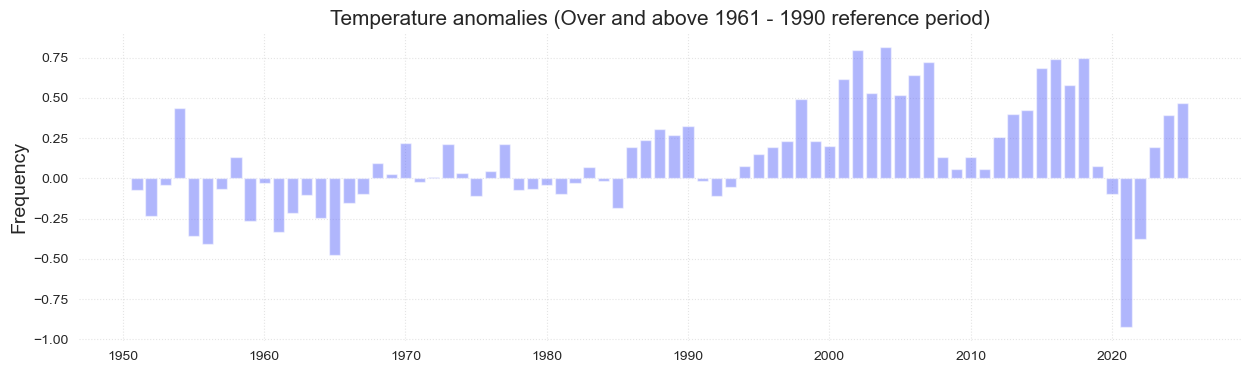

In [14]:
import matplotlib.pyplot as plt
plot_bar_probs(x = st_data.index.year, y = st_data.TMEAN_ref, figsize = [15, 4])
plt.title('Temperature anomalies (Over and above 1961 - 1990 reference period)', fontsize = 15);

### Minimum temperature

In [15]:
dict_plot = [{'data' : st_data, 'var' : 'TMIN', 'ax' : 1, 'label' : 'TMIN'},
        # {'data' : st_data, 'var' : 'TMAX', 'ax' : 1, 'label' : 'TMAX'},
        # {'data' : st_data, 'var' : 'diff', 'ax' : 1, 'label' : 'Difference TMAX - TMIN'}
        ]

In [23]:
dict_plot = [{'data' : st_data, 'var' : 'TMIN', 'ax' : 1, 'label' : 'TMIN'}]
fig = plot_timeseries_interactive(dict_plot, trendline=True, figsize = (25, 12))


### Maximum temperature

In [24]:
dict_plot = [{'data' : st_data, 'var' : 'TMAX', 'ax' : 1, 'label' : 'TMAX'}]
fig = plot_timeseries_interactive(dict_plot, trendline=True, figsize = (25, 12))


### Difference temperature

In [25]:
dict_plot = [{'data' : st_data, 'var' : 'diff', 'ax' : 1, 'label' : 'Difference TMAX - TMIN'}]
fig = plot_timeseries_interactive(dict_plot, trendline=True, figsize = (25, 12))
